In [47]:
import numpy as np 
import pandas as pd 

In [48]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("MPS backend is available")
else:
    print("MPS backend not available")

MPS backend is available


In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /Users/vinay/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [50]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [51]:
path = "/Users/vinay/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train"

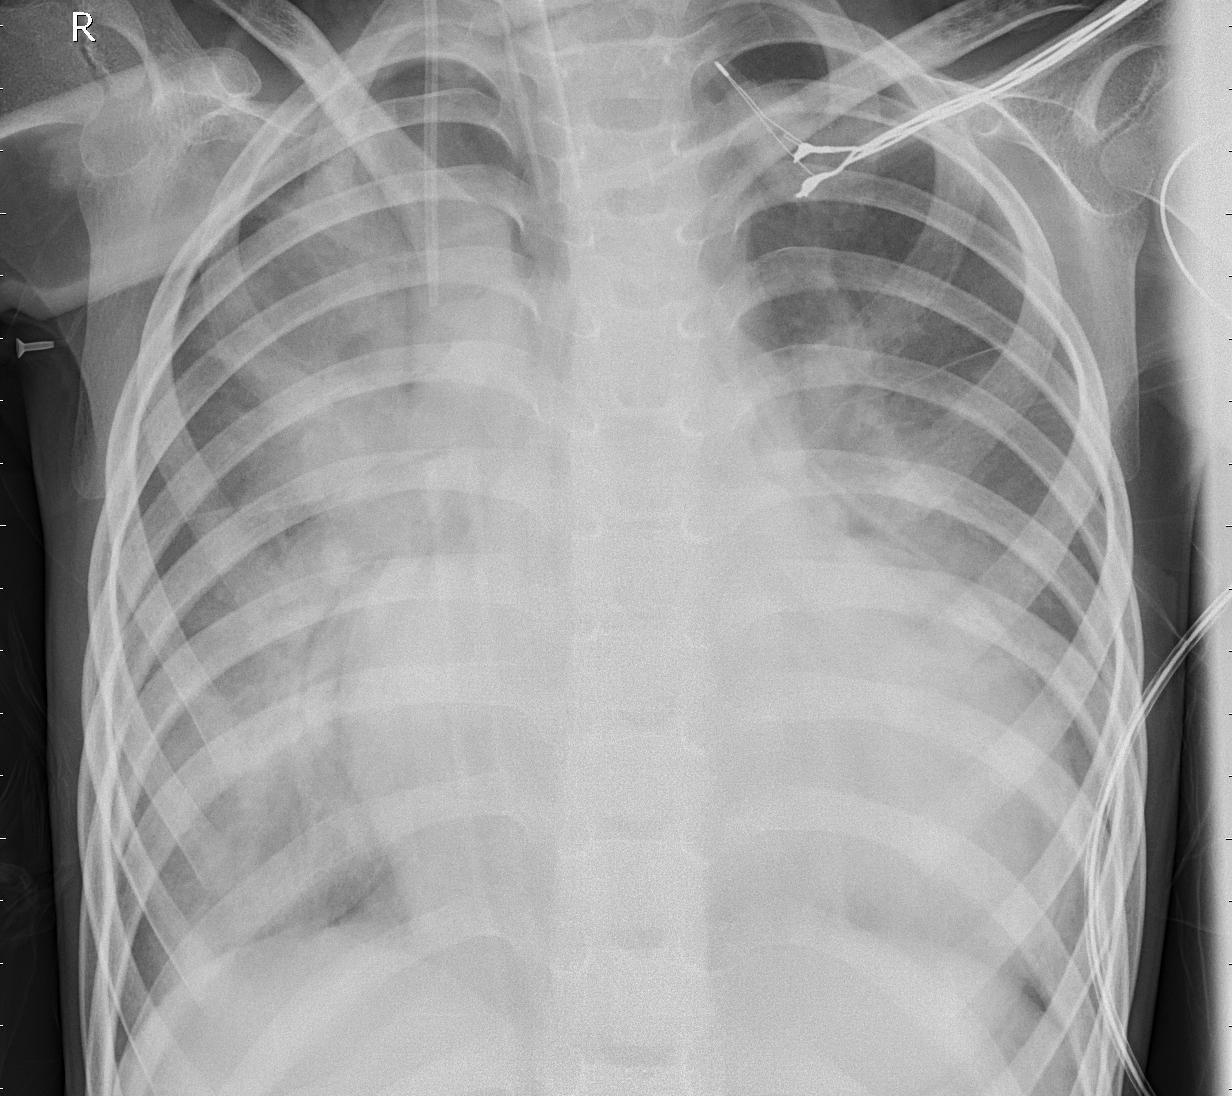

In [52]:
image=f"{path}/PNEUMONIA/person998_bacteria_2928.jpeg"
PIL.Image.open(image)

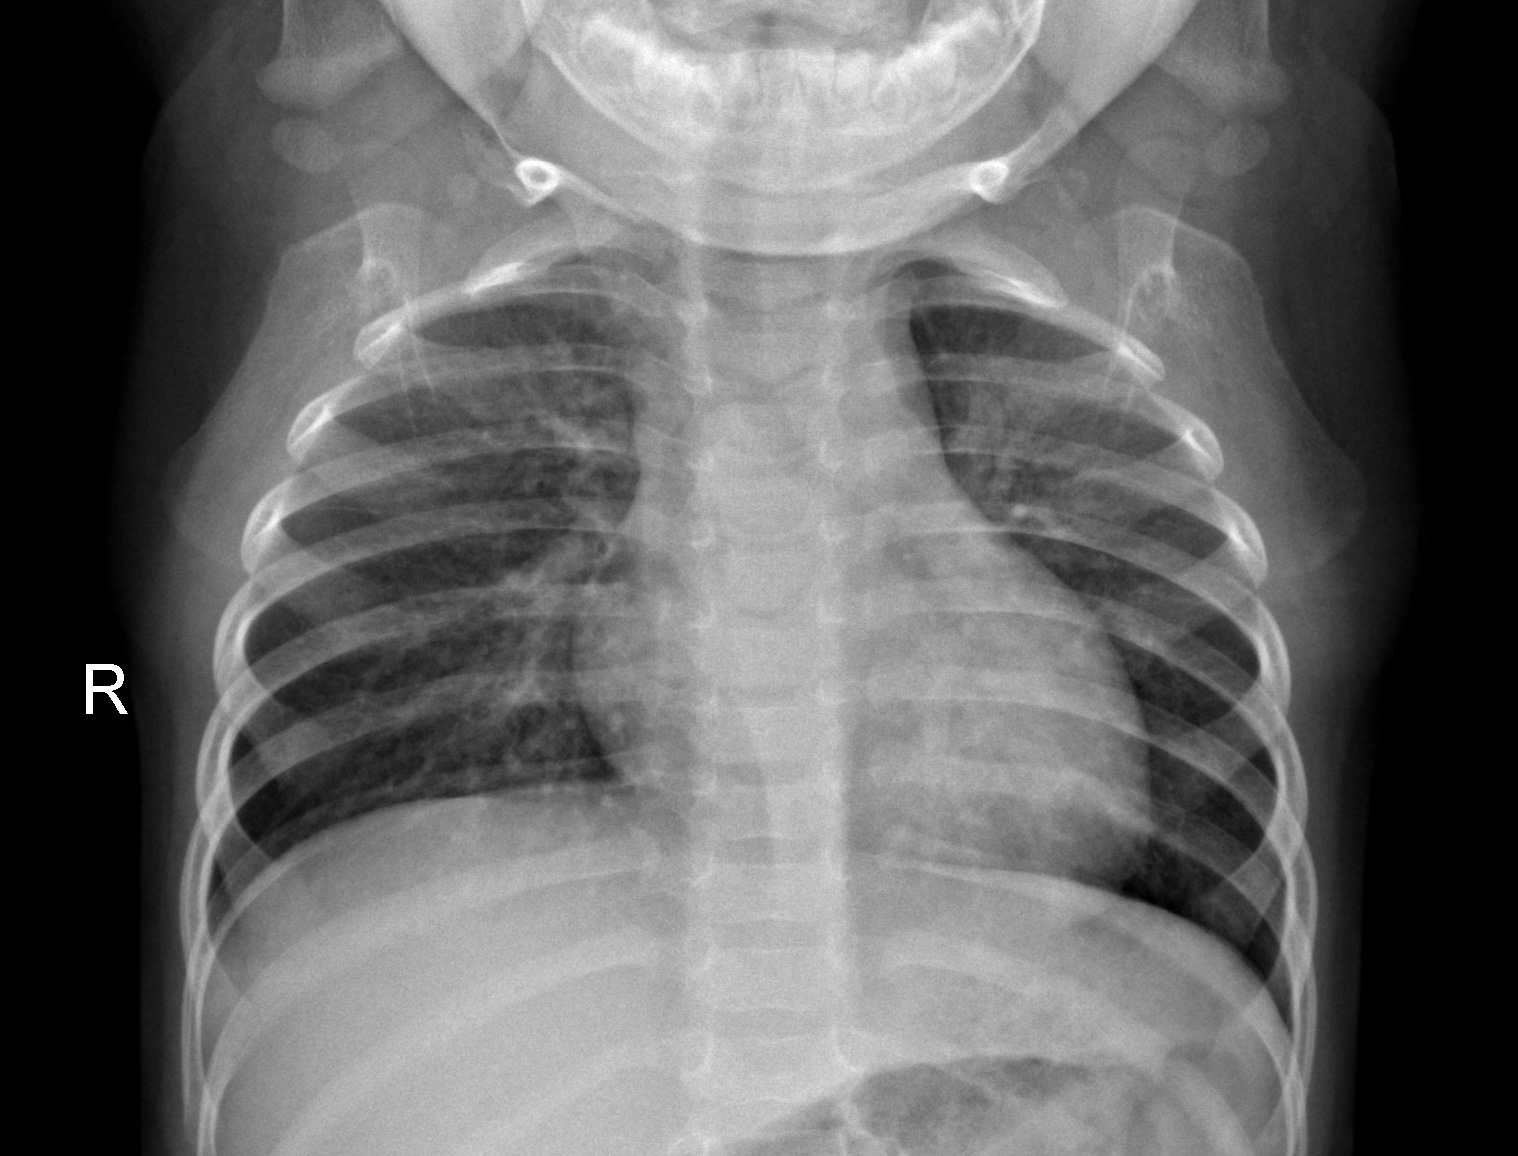

In [53]:
image=f"{path}/NORMAL/IM-0151-0001.jpeg"
PIL.Image.open(image)

In [54]:
import tensorflow as tf


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [56]:
training_dir=path
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [57]:
validation_dir="/Users/vinay/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


In [58]:
test_dir="/Users/vinay/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [59]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [60]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(200, 200, 3)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [61]:

# Compile the model with reduced learning rate and gradient clipping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [63]:
history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 30,
            verbose = 1)

Epoch 1/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 56s 42ms/step - accuracy: 0.7379 - loss: 0.5865 - val_accuracy: 0.5625 - val_loss: 1.4674
Epoch 2/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.8409 - loss: 0.3523 - val_accuracy: 0.6250 - val_loss: 1.1106
Epoch 3/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.8882 - loss: 0.2669 - val_accuracy: 0.6875 - val_loss: 0.8204
Epoch 4/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.9024 - loss: 0.2357 - val_accuracy: 0.6250 - val_loss: 1.2930
Epoch 5/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - accuracy: 0.9159 - loss: 0.2079 - val_accuracy: 0.6250 - val_loss: 0.9355
Epoch 6/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - accuracy: 0.9265 - loss: 0.1889 - val_accuracy: 0.6875 - val_loss: 0.6189
Epoch 7/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.9243 - loss: 0.1867 - val_accuracy: 0.6250 - val_loss: 1.5013
Epoch 8/30
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.9250 -

In [41]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<Figure size 640x480 with 0 Axes>

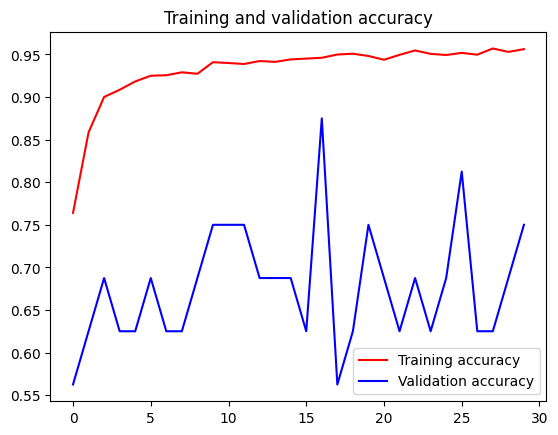

<Figure size 640x480 with 0 Axes>

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [67]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9085 - loss: 0.2622
Loss of the model is -  23.385360836982727 %
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9232 - loss: 0.2057
Accuracy of the model is -  91.50640964508057 %


In [68]:
model.save_weights("model.weights.h5")
print("Saved model weights to disk")


Saved model weights to disk


In [24]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)